In [1]:
import pydotplus as pydotplus
# %pip install manager incase you can't download these packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
#Google Sheet Link: https://docs.google.com/spreadsheets/d/1RiU9c3YihCsAqh18C25WMfTxkOiAf-nXhxAWtEaKLA0/edit#gid=0
pd.set_option('display.max_rows', 200, 'display.min_rows', 30) #Displays a max of 200 rows for testing

sheet_id = '1RiU9c3YihCsAqh18C25WMfTxkOiAf-nXhxAWtEaKLA0'
xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")

arrivals = pd.read_excel(xls, 'Arrivals', header = 0) #Reads in the Google Sheets Data
departures = pd.read_excel(xls, 'Departures', header = 0)
arrivals = arrivals.drop(['blank', 'Communication Type/Reason for Speaking.1'], axis=1) #Drops unnecessary Columns/Headers
departures = departures.drop(['Airport', 'Communication Type/Reason for Speaking.1'], axis=1)

arrivals = arrivals.dropna(thresh=14) #Drops all rows and columns with more than 14 N/A values
departures = departures.dropna(thresh=14)

# create a new leftmost column for the index
# iterate through the rows and index the responses of each flight based on unique flight no.
counter = 0
flight_no = -1
arrivals.insert(loc = 0, # create arrivals indexing
                column = 'index',
                value = 0)
for row in arrivals.iterrows():
    if flight_no != row[1]['Flight No.']:
        flight_no = row[1]['Flight No.']
        counter = 0
    arrivals.loc[row[0], 'index'] = counter
    counter += 1

counter = 0
flight_no = -1
departures.insert(loc = 0, # create departures indexing
                column = 'index',
                value = 0)
for row in departures.iterrows():
    if flight_no != row[1]['Flight No.']:
        flight_no = row[1]['Flight No.']
        counter = 0
    departures.loc[row[0], 'index'] = counter
    counter += 1


#Gets the specifics columns from collected data
x = arrivals[['index']]
y = arrivals[['Communication Type/Reason for Speaking']]

#Splits the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = .25, random_state = 42)

#Creates a random forest classifier using the criterion gini to determine the split
rf = RandomForestClassifier(criterion='gini', bootstrap=True, n_estimators=500)

#Fits the model to the training data
model_rf = rf.fit(xTrain, yTrain.values.ravel())

#Makes a prediction based on the test data
pred = rf.predict(xTest)

#Dipsplays the confusion matrix
confusion_matrix(pred, yTest)

#Prints the accuracy score
print(accuracy_score(yTest,pred))

#display(arrivals)
#display(departures)

0.5340909090909091


In [12]:
%pip install pydotplus
%pip install graphviz # https://graphviz.org/download/

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


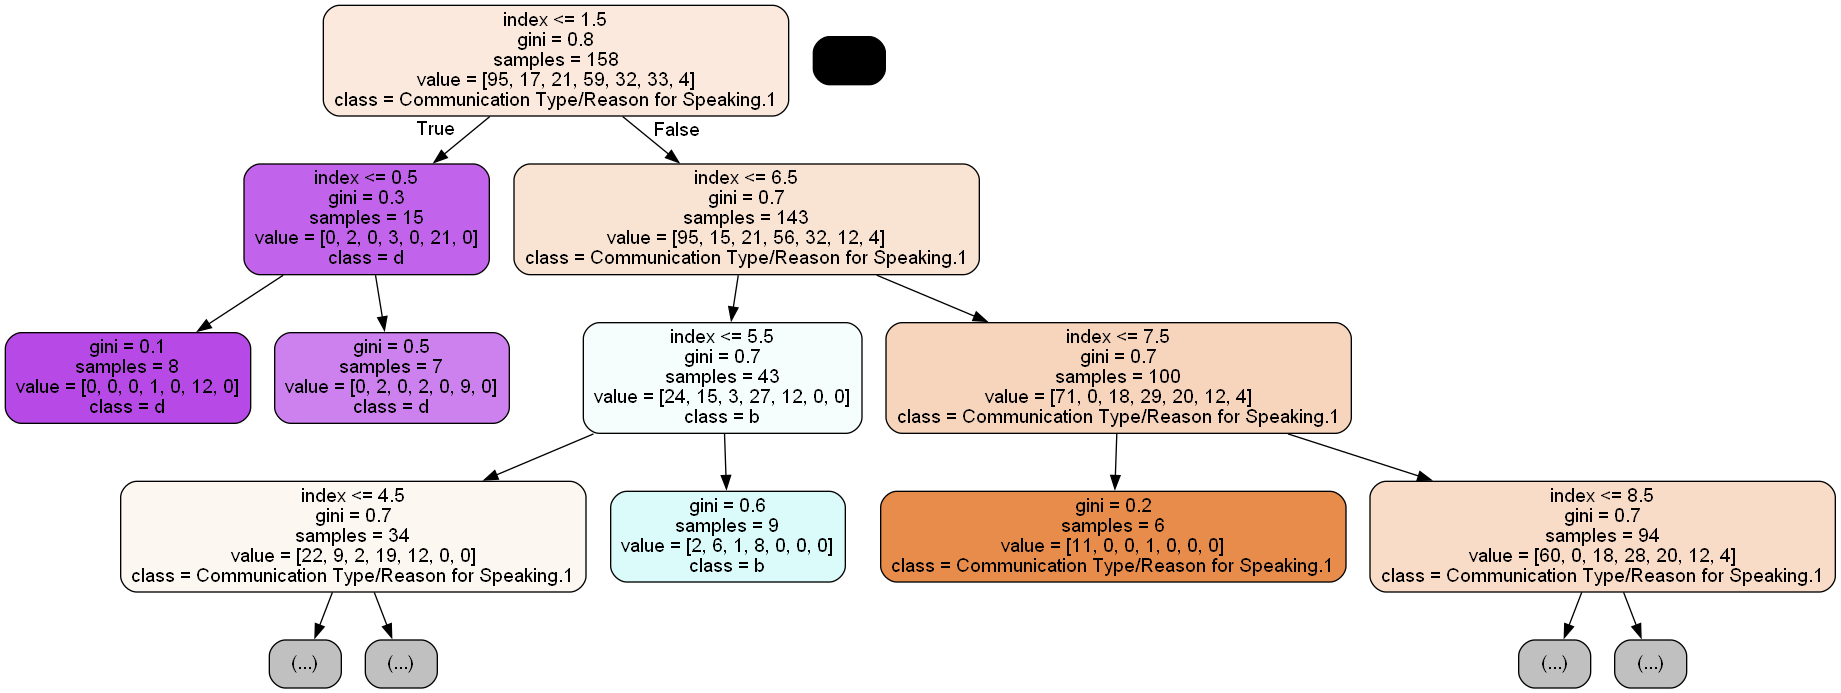

In [13]:
# This cell is for visualizing the tree and is not necessary for the learning process
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO


# export as dot data for visualization
dot_data = StringIO()
estimator = model_rf.estimators_[0] # pick a single tree
max_depth = 3 # limit tree visualization
export_graphviz(estimator, out_file=dot_data, max_depth=max_depth, feature_names=['index'], class_names=['Communication Type/Reason for Speaking.1', 'test', 'a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b', 'c', 'd'], rounded=True, proportion=False, precision=1, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# save tree as png
graph.write_png('tree.png')

# open png
Image(graph.create_png())